# Time over threshold 

Tradicionalmente la carga depositada por la interacción de una partícula con el centellador se estima integrando el pulso de corriente a la salida del tubo fotomultiplicador. 

\begin{equation}
Q=\int_{0}^{\infty} i\left(t\right)dt
\end{equation}

La corriente $i\left(t\right)$ se puede modelar como:

\begin{equation}
i\left(t\right)=i_{0} \exp\left(-\dfrac{t}{\tau_{d}}\right)
\end{equation}

donde $i_{0}$ es la corriente característica de la interacción y está definida como:

\begin{equation}
i_{0}=\lambda Q
\end{equation}

con $\lambda=\dfrac{1}{\tau_{d}}$. Finalmente, $i\left(t\right)$ se puede expresar de la siguiente manera:

\begin{equation}
i\left(t\right)=\lambda Q \exp\left(-\lambda t\right)
\end{equation}

El circuito que se requiere para realizar la integración del pulso y posteriormente registrar la altura de la señal integrada es complejo y no se adapta a las necesidades del SciCRT

Para simplificar la electrónica, buscamos desarrollar un sistema que utilice el Time over threshold. Primero debemos encontrar una relación entre la carga depositada y el tiempo que dura la señal encima de un umbral definido. Consideremos cuatro casos:

1. Sin utilizar circuito de formación
    1. Utilizando un umbral constante
    2. Utilizando un umbral variante en el tiempo
2. Utilizando circuito de formación
    1. Utilizando un umbral constante
    2. Utilizando un umbral variante en el tiempo

El problema de encontrar la relación entre $Q$ y $ToT$ se resuelve mediante un sistema de ecuaciones. 

Consideramos $s\left(t\right)$ la señal del fotomultiplicador y $v\left(t\right)$ la función que describe al umbral. 

## Relación entre $Q$ y $ToT$ para señales de centelleo sin formación 

Sean:

\begin{align}
s\left(t\right) &=s_{0} \exp\left(-\dfrac{t-t_{0}}{\tau_{d}}\right)\newline
v\left(t\right) &=V_{th}
\end{align}

donde $\tau_{d}=\dfrac{1}{\lambda}$ corresponde con la constante de decaimiento del centellador, $s_{0}=k*i_{0}$  y $t_{0}$ el tiempo en que ocurre el evento. $k$ representa la transimpedacia del amplificador.

A continuación se muestra un ejemplo de ambas señales.


In [64]:
#%matplotlib inline

import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(rc={"figure.figsize": (8,4)})
sns.set_context('notebook',font_scale=1.0,rc={'lines.linewidth':2.0})
mat.rc('text',usetex=True)
mat.rc('font',family="serif",serif="palatino")
mat.rcParams['text.latex.preamble']=[r'\usepackage[utf8]{inputenc}',r'\usepackage{mathpazo}',r'\usepackage[euler-digits,euler-hat-accent]{eulervm}',r'\usepackage[T1]{fontenc}',r'\usepackage[spanish]{babel}',r'\usepackage{amsmath,amsfonts,amssymb}',r'\usepackage{siunitx}'] 

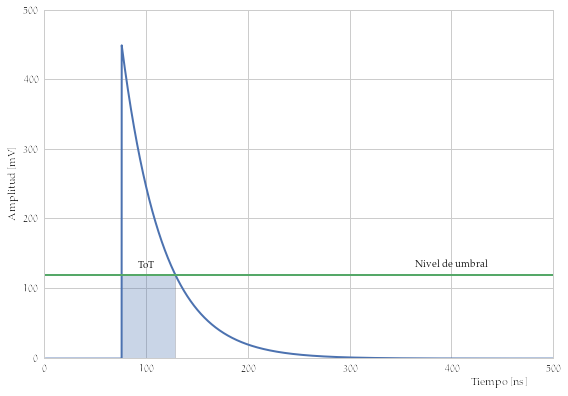

In [65]:
tau=40.0 # de acuerdo con la documentación de la FEB 
step=0.1 # incremento en el tiempo
Vth=120.0 # calculado a partir de lo expuesto por Y. Nagai en su tesis doctoral 
          # en la siguiente seccion se explica el procedimiento
N=500 # numero de muestras temporales
s0=450.0 # calculado a partir de lo expuesto por Y. Nagai en su tesis doctoral
t0=75.0 # tiempo en el que ocurre el evento de radiacion 

t=np.arange(0,N,step)
etime=np.array([np.exp(-(1.0/tau)*(x-t0)) if x>=t0 else 0 for x in t]) # senal del mapmt sin circuito de formacion
eout=s0*(1.0/np.amax(etime))*etime # normalizamos etime para que s0 sea la amplitud real de la senal

fig=plt.figure()
with sns.axes_style('whitegrid'):
    ax=fig.add_subplot(1,1,1)
    ax.plot(t,eout)
    ax.plot([t[0],t[-1]],[Vth,Vth])
    ax.fill_between(t,0,Vth,where=(eout)>Vth,linewidth=0.5,alpha=0.3)
plt.tight_layout(pad=1.7)
plt.xlabel(r'Tiempo $[\si{\nano\second}]$',x=0.95,horizontalalignment='right')
plt.ylabel(r'Amplitud $[\si{\milli\volt}]$')
ax.text(400.0,Vth+15,r'Nivel de umbral',ha='center',va='center')
ax.text(100.0,Vth+15,r'ToT',ha='center',va='center')
plt.ylim(0,500)
plt.savefig('definicion.pdf')

La relación entre $Q$ y $ToT$ se obtiene encontrando los punto de intersección entre las curvas $s\left(t\right)$ y $v\left(t\right)$. Explicitamente resolviendo el sistema de ecuaciones:

\begin{align}
\left. s\left(t\right)\right|_{t=ti} &= \left. v\left(t\right)\right|_{t=ti} \newline
\left. s\left(t\right)\right|_{t=tf} &= \left. v\left(t\right)\right|_{t=tf}
\end{align}

donde $t_{i}$ y $t_{f}$ representan los puntos en que la señal rebasa el umbral. Es importante notar que $ToT=t_{f}-t_{i}$.

Considerando las señales que definimos previamente, la primera ecuación del sistema tiene infinidad de soluciones, pero podemos obtener la relación a partir de la segunda ecuación:

\begin{equation}
s_{0} \exp\left(-\dfrac{t_{f}-t_{0}}{\tau_{d}}\right)=V_{th}
\end{equation}

debemos señalar que para este caso: $t_{0}=t_{i}$, y por lo tanto despejando $ToT$ obtenemos  $ToT\left(s_{0}\right)$:

\begin{align}
ToT &= -\ln\left(\dfrac{V_{th}}{s_{0}}\right)^{\tau_{d}}\newline
 &= \tau_{d} \ln\left(s_{0}\right)-K
\end{align}

Como se observa, la relación no es lineal. Para verificar este comportamiento realizaremos la siguiente simulación. Primero consideramos que $s_{0}$ es una variable aleatoria distribuida normalmente $X\ \sim\ \mathcal{N}\left(\mu_{rc},\,\sigma_{rc}^2\right)$. A continuación debemos investigar cuales son los valores adecuados para estas variables.

De acuerdo con la tesis doctoral de Yuya Nagai, el rango de valores de $s_{0}$ es entre $2200$ y $4095$. Es importante señalar que estos valores corresponden a niveles de cuantización del convertidor analógico digital y no representan directamente la información de la amplitud en Volts. Idealmente la relación entre los valores ADC y las amplitudes en Volts de la señal es lineal, sin embargo en la práctica no se conserva totalmente está premisa. Para el caso de nuestra simulación consideraremos una relación lineal entre ambas variables, es decir:

\begin{equation}
S_{ADC}=m*s_{V}+b 
\end{equation}

De acuerdo con el poster presentando por Yoshinori Sasai en el ICRC 2013, los valores aproximados para ambos parámetros son: $m=800$ y $b=2100$.   

La conversión analógica-digital en el SciCRT se realiza a través de la BEB, con una resolución de $12\text{ bits}$. Para una resolución de esté tipo se tienen en total $4096$ niveles de cuantización. El rango de valores entre $0$ y $2047$ se utiliza para la conversión de señales de amplitud positiva. Recordando que la señales provenientes del MAPMT son de polaridad negativa, sólo la mitad de los niveles es útil. Por otro lado, si consideramos el ruido intrínseco de la electrónica del detector, sólo los valores de amplitud que superiores a $\approx 2200$ niveles de cuantización pueden considerar señal de rayos cósmicos. A este nivel se le denomina el \emph{pedestal}. De esta forma, podemos establecer un valor de $\mu_{ADC}$ de $2400$, el cual correspondería a una señal de rayos cósmicos. El valor de $\sigma_{ADC}$ lo podemos establecer tomando en cuenta que la variable aleatoria debe tener un rango (ADC) entre $2200$ y $4095$. Usando $\sigma_{adc}=72.0$ el $99\%$ de los valores de la distribución se encuentra a la derecha del intervalo.

El siguiente paso de la simulación es generar la variable aleatorio que representa la altura de los pulsos, tomando la precacución de mapear los valores definidos como ADC a unidades de voltaje. 

Ya que el método $ToT$ requiere la definición de un umbral, debemos elegir un valor que se encuentre dentro de el intervalo mencionado anteriormente. Como primera aproximación proponemos $Thrs_{ADC}=2100$.

El siguiente código genera las variables necesarias y su conversión a Volts. Es importante notar que para que la altura de la señal $s\left(t\right)$ sea correcta, primero debemos normalizar la señal a una amplitud unitaria y posteriormente multiplicarla por el valor de la conversión a Volts.

In [66]:
import scipy.stats as stats

In [67]:
f_mv=1000.0 # factor de conversion a mili volts
M=10000 # numero total de eventos a simular
thrs_adc=2110.0
tot_t=120.0
m_fit,b_fit=800.0,2100.0
mu,sigma=2400.0,72.0

thrs=(1.0/m_fit)*(thrs_adc-b_fit) # conversion del umbral definido en ADC a volts
eadc=stats.norm.rvs(loc=mu,scale=sigma,size=M) # la amplitud de la senal es una
                                                # variable aleatoria distribuida normalmente
evolt=(1.0/m_fit)*(eadc-b_fit) # conversion de las amplitudes en volts 
eout=(1.0/np.amax(etime))*etime*np.transpose(evolt[np.newaxis]) # normalizacion

Para obtener $ToT$, contamos el número de muestras en las que la señal $s\left(t\right)$ superó el umbral. El conteo lo realizamos computacionalmente a través de la suma.

A continuación se muestran los resultados.

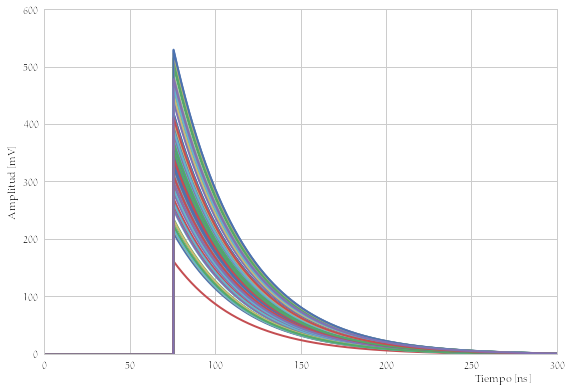

In [81]:
etot=step*np.sum(eout>thrs,1) # time over threshold

# primero se muestran las señales a simular 

fig=plt.figure()
with sns.axes_style('whitegrid'):
    ax=fig.add_subplot(1,1,1)
    ax.plot(t,np.transpose(f_mv*eout[0:100,:]))
top=100.0*np.ceil(10.0*np.amax(eout[0:100,:]))    
plt.tight_layout(pad=1.9)
plt.xlabel(r'Tiempo $[\si{\nano\second}]$',x=0.95,horizontalalignment='right')
plt.ylabel(r'Amplitud $[\si{\milli\volt}]$')
plt.xlim(0,300)
plt.ylim(0,top)
plt.savefig('sen-gauss.pdf')

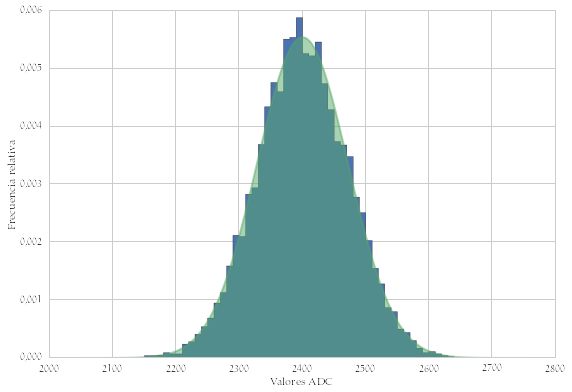

In [69]:
# mostramos el histograma de la senal de radiacion incidente

bh=np.arange(2000,3000,10)
bd=np.arange(2000,3000,1)
adc_pdf=stats.norm.pdf(bd,mu,sigma)

fig=plt.figure()
c0=sns.color_palette()[1]
with sns.axes_style('whitegrid'):
    ax=fig.add_subplot(1,1,1)
    ax.hist(eadc,bins=bh,normed=True,histtype='stepfilled')
    ax.fill(bd,adc_pdf,linewidth=2.0,alpha=0.5,color=c0)
plt.tight_layout(pad=1.7)
plt.xlabel('Valores ADC')
plt.ylabel('Frecuencia relativa')    
plt.xlim(2000,2800)
plt.ylim(0,0.006)
plt.savefig('dist-gauss.pdf')

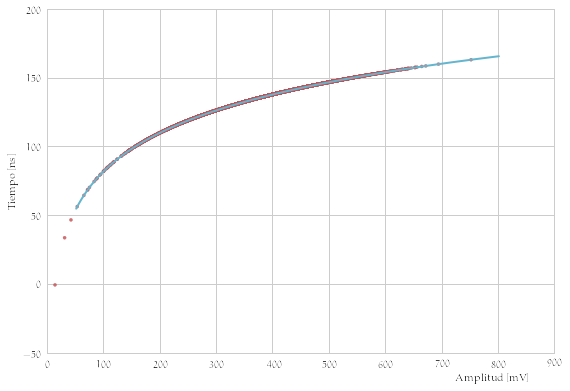

In [75]:
# ahora mostramos la relación ToT vs s0
volts=np.arange(50,800,0.1)
k=tau*np.log(f_mv*thrs)
tot=tau*np.log(volts)-k

fig=plt.figure()
c1=sns.color_palette()[2]
c2=sns.color_palette()[-1]
with sns.axes_style('whitegrid'):
    ax=fig.add_subplot(1,1,1)
    ax.scatter(f_mv*evolt,etot,s=10,alpha=0.8,rasterized=True,color=c1)
    ax.plot(volts,tot,color=c2)
plt.tight_layout(pad=1.9)
plt.xlabel(r'Amplitud $[\si{\milli\volt}]$',x=0.95,horizontalalignment='right')
plt.ylabel(r'Tiempo $[\si{\nano\second}]$')
plt.xlim(0,900)
plt.savefig('nonlin-tot.pdf')

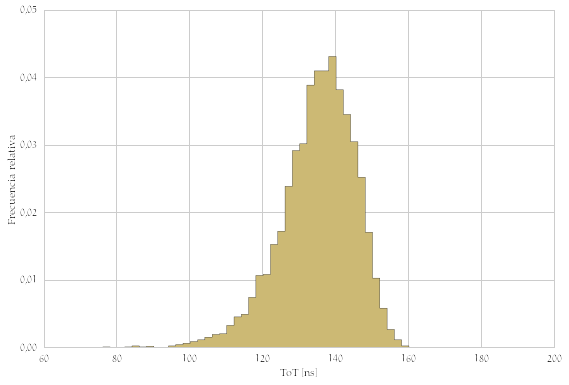

In [78]:
# finalmente se muestra el histograma usando ToT

bt=np.arange(60,200,2)

fig=plt.figure()
c3=sns.color_palette()[4]
c4=sns.color_palette()[3]

with sns.axes_style('whitegrid'):
    ax=fig.add_subplot(1,1,1)
    ax.hist(etot,bins=bt,normed=True,histtype='stepfilled',color=c3)
plt.tight_layout(pad=2.3)
plt.xlabel(r'ToT $\left[\si{\nano\second}\right]$')
plt.ylabel('Frecuencia relativa')    
plt.xlim(60,200)
plt.ylim(0,0.05)
plt.savefig('non-gauss.pdf')

###  Utilizando un umbral adaptable

Buscando eliminar la relación no lineal entre ambas variables, un método es utilizar un umbral variante en el tiempo que se adapte a la señal de entrada. Consideramos el sistema de ecuaciones definido anteriormente:

\begin{align}
\left. s\left(t\right)\right|_{t=ti} &= \left. v\left(t\right)\right|_{t=ti} \newline
\left. s\left(t\right)\right|_{t=tf} &= \left. v\left(t\right)\right|_{t=tf}
\end{align}

Para el caso de señales sin formación, sólo la segunda ecuación es de interés ya que la primera tiene infinidad de soluciones. Por lo tanto tenemos la siguiente relación:

\begin{equation}
s_{0} \exp\left(-\dfrac{ToT}{\tau_{d}}\right)=\left. v\left(t\right)\right|_{t=tf}
\end{equation}

Si hacemos $v\left(t\right)=\left(1/k\right) \cdot \left(t\right)\cdot \exp\left(-t/\tau_{d}\right)$, obtenemos la siguiente relación:

\begin{equation}
ToT=k\cdot s_{0}
\end{equation}

donde $k$ es una constante de proporcionalidad que define la sensibilidad de la conversión.

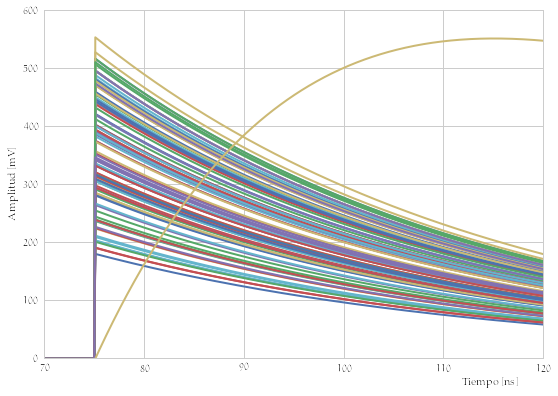

In [72]:
vth_adp=1.5*(1.0/tau)*(t-t0)*np.exp(-(1.0/tau)*(t-t0))
tot_adp=step*np.sum(eout[:,700:1000]>vth_adp[700:1000],1)

fig=plt.figure()
with sns.axes_style('whitegrid'):
    ax=fig.add_subplot(1,1,1)
    ax.plot(t,np.transpose(f_mv*eout[100:200]))
    ax.plot(t,f_mv*vth_adp)             
top=100.0*np.ceil(10.0*np.amax(eout[100:200,:]))
plt.tight_layout(pad=1.7)
plt.xlabel(r'Tiempo $[\si{\nano\second}]$',x=0.95,horizontalalignment='right')
plt.ylabel(r'Amplitud $[\si{\milli\volt}]$')
plt.xlim(70,120)
plt.ylim(0,top)
plt.savefig('adap-thresh.pdf')

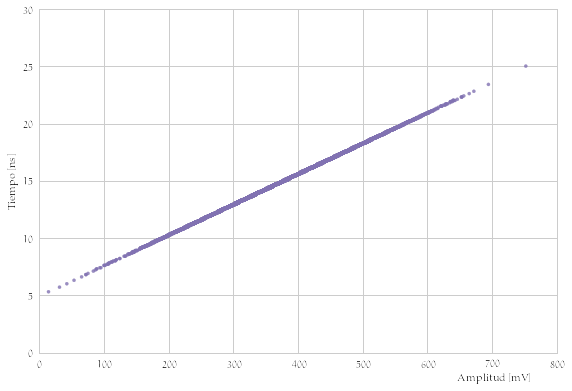

In [80]:
fig=plt.figure()
with sns.axes_style('whitegrid'):
    ax=fig.add_subplot(1,1,1)
    ax.scatter(f_mv*evolt,tot_adp,s=10,alpha=0.8,rasterized=True,color=c4)
plt.tight_layout(pad=1.9)
plt.xlabel(r'Amplitud $[\si{\milli\volt}]$',x=0.95,horizontalalignment='right')
plt.ylabel(r'Tiempo $[\si{\nano\second}]$')
plt.ylim(0,30)
plt.xlim(0,800)
plt.savefig('lin-tot.pdf')